<a href="https://colab.research.google.com/github/AbrahamMH19/Valores-At-picos/blob/main/Actividad_3_Valores_At%C3%ADpicos_A01737333.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos las librerías pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#cargar archivo csv desde equipo
from google.colab import files
files.upload()


In [ ]:
#Carga un archivo csv sin indice
data=pd.read_csv('Ventas_Totales_sin_nulos.csv')
data

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

**PROCEDIMIENTO PARA SEPARAR DATAFRAME EN 2 PARTES (CUANTITATIVAS Y CUALITATIVAS)**


In [ ]:
#Verificamos información del Dataframe
data.info()


In [ ]:
#Filtro para obtener variables cuantitativas
Cuantitativas=data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,2]]
Cuantitativas

In [ ]:
#Filtro para obtener variables cualitativas
#Cualitativas=data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
#Cualitativas

<Figure size 1500x800 with 0 Axes>

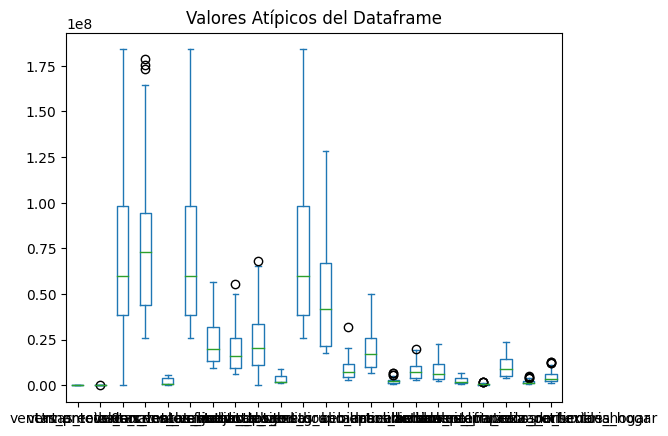

In [29]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,8))
Cuantitativas.plot(kind='box',vert=True)
plt.title("Valores Atípicos del Dataframe")
plt.show()#Dibujamos el diagrama

**PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [30]:
#Método aplicando desviación estándar. Encuentro los valores extremos
y=Cuantitativas
Limite_Superior=y.mean()+ 3*y.std()
Limite_Inferior=y.mean()- 3*y.std()
print("Límite superior permitido",Limite_Superior)
print("Límite inferior permitido",Limite_Inferior)

Límite superior permitido Unnamed: 0                             8.872301e+01
ventas_precios_corrientes              2.143126e+05
ventas_precios_constantes              4.002291e+04
ventas_totales_canal_venta             2.074407e+08
salon_ventas                           1.976066e+08
canales_on_line                        7.623053e+06
ventas_totales_medio_pago              2.059531e+08
efectivo                               6.191160e+07
tarjetas_debito                        5.817949e+07
tarjetas_credito                       7.611201e+07
otros_medios                           1.075383e+07
ventas_totales_grupo_articulos         2.059531e+08
subtotal_ventas_alimentos_bebidas      1.451900e+08
bebidas                                2.652722e+07
almacen                                5.517433e+07
panaderia                              6.984940e+06
lacteos                                2.223825e+07
carnes                                 2.509435e+07
verduleria_fruteria                   

In [31]:
#Ajustar maximo de filas
pd.options.display.max_rows=None

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
Datos_sin_outliers=Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_outliers

In [20]:
#Corroboramos valores nulos
valores_nulos=Datos_sin_outliers.isnull().sum()
valores_nulos

Unnamed: 0    0
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=Cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)


In [ ]:
#Obtenemos datos limpios del Dataframe
Datos_sin_Outliers_iqr= Cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Datos_sin_Outliers_iqr

In [35]:
#Corroboramos valores nulos
valores_nulos=Datos_sin_Outliers_iqr.isnull().sum()
valores_nulos

Unnamed: 0                             0
ventas_precios_corrientes              1
ventas_precios_constantes              3
ventas_totales_canal_venta             0
salon_ventas                           3
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        1
tarjetas_credito                       1
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                1
almacen                                0
panaderia                              4
lacteos                                1
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         4
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    4
electronicos_articulos_hogar           4
ventas_precios_constantes              3
dtype: int64

In [36]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_iqr=Datos_sin_Outliers_iqr.copy()
data_clean_iqr=data_clean_iqr.fillna(round(Datos_sin_Outliers_iqr.mean(),1))
data_clean_iqr


,Unnamed: 0,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,ventas_precios_constantes
0,0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,27477.3
1,1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,25223.4
2,2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,26334.3
3,3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,27045.9
4,4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,25631.9
5,5,29132.7,26365.4,2.913271e+07,2.876387e+07,3.688473e+05,2.913271e+07,1.056549e+07,7.337457e+06,9.196110e+06,...,7.911936e+06,1.083494e+06,3.322050e+06,2.883229e+06,9.522033e+05,3.451141e+05,4.277890e+06,1.001572e+06,1.893542e+06,26365.4
6,6,31182.3,27819.4,3.118230e+07,3.081531e+07,3.669907e+05,3.118230e+07,1.090591e+07,8.183012e+06,1.016290e+07,...,8.482568e+06,1.153102e+06,3.534097e+06,3.013144e+06,9.943436e+05,3.800082e+05,4.599798e+06,1.026743e+06,1.995091e+06,27819.4
7,7,31154.9,27394.1,3.115488e+07,3.076336e+07,3.915251e+05,3.115488e+07,1.104163e+07,7.899351e+06,1.000000e+01,...,8.275620e+06,1.147970e+06,3.604272e+06,2.946951e+06,1.060479e+06,3.701912e+05,4.585004e+06,7.864155e+05,1.882134e+06,27394.1
8,8,30521.5,26404.3,3.052151e+07,3.013560e+07,3.859105e+05,3.052151e+07,1.078917e+07,7.888243e+06,9.795879e+06,...,8.319868e+06,1.144159e+06,3.640337e+06,2.991425e+06,1.078616e+06,3.625737e+05,4.708172e+06,7.405727e+05,1.673424e+06,26404.3
9,9,32446.0,27766.7,3.244598e+07,3.198022e+07,4.657591e+05,3.244598e+07,1.122031e+07,8.695477e+06,1.144746e+07,...,8.282232e+06,1.171283e+06,3.698963e+06,3.091847e+06,1.147860e+06,3.811761e+05,4.889144e+06,8.704811e+05,2.404158e+06,27766.7


In [37]:
#Corroboramos valores nulos
valores_nulos=data_clean_iqr.isnull().sum()
valores_nulos

Unnamed: 0                             0
ventas_precios_corrientes              0
ventas_precios_constantes              0
ventas_totales_canal_venta             0
salon_ventas                           0
canales_on_line                        0
ventas_totales_medio_pago              0
efectivo                               0
tarjetas_debito                        0
tarjetas_credito                       0
otros_medios                           0
ventas_totales_grupo_articulos         0
subtotal_ventas_alimentos_bebidas      0
bebidas                                0
almacen                                0
panaderia                              0
lacteos                                0
carnes                                 0
verduleria_fruteria                    0
alimentos_preparados_rotiseria         0
articulos_limpieza_perfumeria          0
indumentaria_calzado_textiles_hogar    0
electronicos_articulos_hogar           0
ventas_precios_constantes              0
dtype: int64

**UNIÓN DE DATAFRAME CUANTITATIVO CON DATAFRAME CUALITATIVO**

In [38]:
Dataframe_final = pd.concat([Cualitativas, data_clean_iqr], axis=1)
Dataframe_final


,ventas_precios_corrientes,ventas_precios_constantes,ventas_totales_canal_venta,salon_ventas,canales_on_line,ventas_totales_medio_pago,efectivo,tarjetas_debito,tarjetas_credito,otros_medios,...,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rotiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronicos_articulos_hogar,ventas_precios_constantes
0,27858.9,27477.3,2.785887e+07,2.759173e+07,2.671420e+05,2.785887e+07,1.023010e+07,6.864575e+06,9.047205e+06,1716991.073,...,6.705475e+06,9.459063e+05,2.880656e+06,2.606193e+06,1.050314e+06,3.407774e+05,4.397544e+06,7.723718e+05,1.838507e+06,27477.3
1,25994.2,25223.4,2.599420e+07,2.574918e+07,2.450208e+05,2.599420e+07,9.719067e+06,6.438494e+06,8.309150e+06,1527488.518,...,6.576625e+06,9.256186e+05,2.855640e+06,2.600084e+06,1.026167e+06,3.282887e+05,4.053284e+06,6.722905e+05,1.257662e+06,25223.4
2,27780.0,26334.3,2.778001e+07,2.747223e+07,3.077778e+05,2.778001e+07,1.024444e+07,6.908523e+06,8.845010e+06,1782030.557,...,7.437264e+06,1.016148e+06,3.188259e+06,2.824977e+06,1.075526e+06,3.533352e+05,4.354198e+06,6.676967e+05,1.305675e+06,26334.3
3,29134.3,27045.9,2.913427e+07,2.882748e+07,3.067927e+05,2.913427e+07,1.031263e+07,7.454252e+06,9.458167e+06,1909221.374,...,8.211244e+06,1.132396e+06,3.257140e+06,3.006159e+06,1.037213e+06,3.596945e+05,4.355707e+06,8.389482e+05,1.535726e+06,27045.9
4,27969.0,25631.9,2.796900e+07,2.756931e+07,3.996933e+05,2.796900e+07,1.014761e+07,6.735747e+06,9.220930e+06,1864714.157,...,7.651058e+06,1.033082e+06,3.232636e+06,2.799142e+06,9.826512e+05,3.365680e+05,4.206102e+06,9.158951e+05,1.824462e+06,25631.9
5,29132.7,26365.4,2.913271e+07,2.876387e+07,3.688473e+05,2.913271e+07,1.056549e+07,7.337457e+06,9.196110e+06,2033652.189,...,7.911936e+06,1.083494e+06,3.322050e+06,2.883229e+06,9.522033e+05,3.451141e+05,4.277890e+06,1.001572e+06,1.893542e+06,26365.4
6,31182.3,27819.4,3.118230e+07,3.081531e+07,3.669907e+05,3.118230e+07,1.090591e+07,8.183012e+06,1.016290e+07,1930477.521,...,8.482568e+06,1.153102e+06,3.534097e+06,3.013144e+06,9.943436e+05,3.800082e+05,4.599798e+06,1.026743e+06,1.995091e+06,27819.4
7,31154.9,27394.1,3.115488e+07,3.076336e+07,3.915251e+05,3.115488e+07,1.104163e+07,7.899351e+06,1.000000e+01,2098727.771,...,8.275620e+06,1.147970e+06,3.604272e+06,2.946951e+06,1.060479e+06,3.701912e+05,4.585004e+06,7.864155e+05,1.882134e+06,27394.1
8,30521.5,26404.3,3.052151e+07,3.013560e+07,3.859105e+05,3.052151e+07,1.078917e+07,7.888243e+06,9.795879e+06,2048214.044,...,8.319868e+06,1.144159e+06,3.640337e+06,2.991425e+06,1.078616e+06,3.625737e+05,4.708172e+06,7.405727e+05,1.673424e+06,26404.3
9,32446.0,27766.7,3.244598e+07,3.198022e+07,4.657591e+05,3.244598e+07,1.122031e+07,8.695477e+06,1.144746e+07,1082741.605,...,8.282232e+06,1.171283e+06,3.698963e+06,3.091847e+06,1.147860e+06,3.811761e+05,4.889144e+06,8.704811e+05,2.404158e+06,27766.7


**DESCARGA DE DATAFRAME PROCESADO**

In [40]:
#Convertir DataFrame a CSV
Dataframe_final.to_csv("Dataframe_procesado_ventas_totales.csv")


In [41]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Dataframe_procesado_ventas_totales.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>